# 📊 Capstone Project Module 2

## 🎯 Project Objectives

Tujuan dari Capstone Project Module 2 ini adalah untuk mendapatkan insight dan melakukan optimisasi sales beserta actionablenya.

## Data Dictionary

### People
 - ID:Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
### Products
 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years
### Promotion
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
### Place
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to the company’s website in the last month

## Problem Statement

Dari Data Dictionary di atas, ada beberapa pertanyaan yang bisa di ajukan untuk tujuan analisa. Diantaranya:

- Apakah Income atau penghasilan tahunan sebuah rumah tangga atau keluarga berpengaruh terhadap pembelian?
- Apakah campaign atau acara promosi yang diberikan Supermarket berhasil untuk mendorong pembelian? jika iya, promosi yang mana yang efektif?
- Bagaimanakah cara customer berbelanja? Apakah dengan adanya website atau laman supermarket, pembelian bisa di-insentifkan?

# Library Loading

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

# Data Loading

In [53]:
df = pd.read_csv("Supermarket Customers.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Disini terlihat bahwa data sudah di-load dengan baik.

## Data Understanding

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari hasil .info() di atas, terlihat bahwa rata-rata, setiap column memiliki 2240 row, kecuali column *Income* yang hanya memiliki 2216 row, menunjukkan adanya Missing value.

In [55]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Dengan menggunakan .describe(), kita bisa mendapatkan informasi detail tentang column yang bersifat numerical, termasuk mean dan median, quartil, serta standard deviation. Ini berguna untuk kita memilih data yang akan diproses untuk analisis nantinya.

In [56]:
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Bisa dilihat dari hasil .isnull() yang dihitung menggunakan .sum(), column *Income* memiliki 24 row data yang missing. 

In [57]:
df.duplicated().sum()

np.int64(0)

Dilakukan juga pengecekan untuk data-data duplikat, untuk menghindari hasil analisis yang tidak tepat. Hasil .duplicated() yang di hitung dengan sum() menunjukkan tidak ada data yang ter-duplikasi.

# Data Pre-processing

## Data Cleaning

Dengan mempertimbangkan bahwa kolom **'Income'**  memiliki jumlah *missing data* yang relatif kecil , **saya** memutuskan untuk **menghapus** (*drop*) baris-baris yang memiliki nilai $\text{missing}$ pada kolom tersebut.

**Saya** memilih langkah ini sebagai alternatif dari pengisian (*imputation*) menggunakan *mean* atau *median* karena tingginya **variansi** pada data pendapatan, yang dikhawatirkan akan menghasilkan representasi yang **tidak akurat** jika *mean* atau *median* digunakan.

In [58]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Bisa dilihat juga dari .info() bahwa column *education*, *Marital_status* dan *Dt_Customer* adalah data bertipe object, menunjukkan bahwa column-column tersebut memiliki data non-numerical atau non angka, sehingga perlu dilakukan pengecekan untuk data noise.

In [59]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- Education ---
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

--- Marital_Status ---
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

--- Dt_Customer ---
Dt_Customer
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
01-11-2013     1
10-08-2013     1
11-10-2012     1
20-12-2012     1
09-01-2014     1
Name: count, Length: 662, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1824\3859618382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_status_check.index, y=marital_status_check.values, palette='viridis')


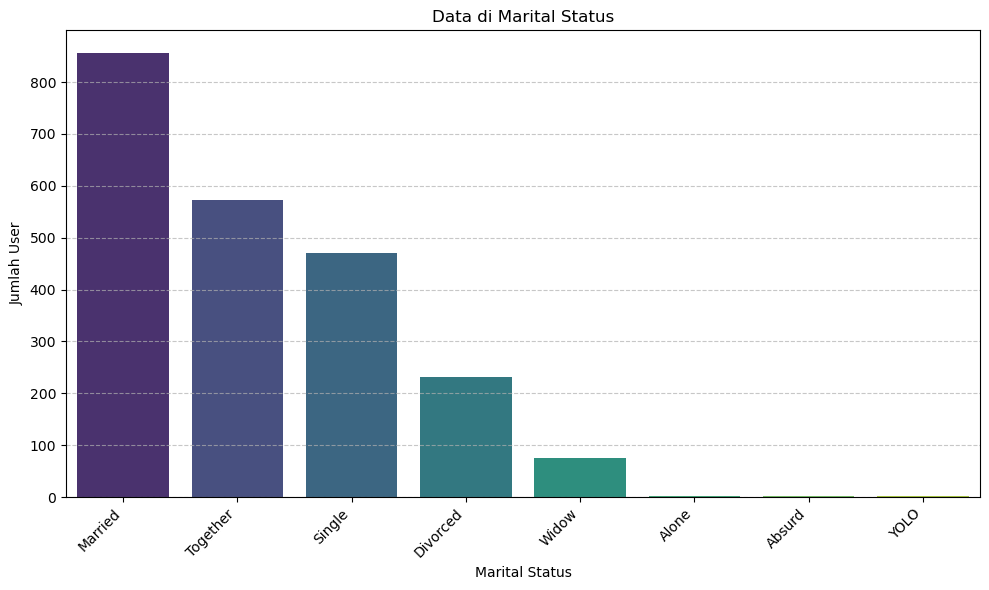

In [60]:
plt.figure(figsize=(10, 6))
marital_status_check = df['Marital_Status'].value_counts()


sns.barplot(x=marital_status_check.index, y=marital_status_check.values, palette='viridis')
plt.title('Data di Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Jumlah User')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 Kita juga bisa melihat, bahwa dalam column Data di Marital Status bisa diasosiasikan *Married* dengan *Married*, *Together* dengan *Together*, *Divorced* dengan *Divorced*, *Widow* dengan *Divorced*, *Alone* dengan *Single*, *Absurd* dengan *Single*, *YOLO* dengan *Single*. Hal ini akan sesuai dengan konteks dari Supermarket Customer mengenai 

In [61]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Married',
    'Together': 'Married',
    'Divorced': 'Divorced',
    'Widow': 'Divorced',
    'Alone' : 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single'
})

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [62]:
# Langkah 1: Konversi kolom 'Dt_Customer' ke tipe data datetime
# Gunakan format '%d-%m-%Y' karena data Anda menggunakan format DD-MM-YYYY (04-09-2012)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Langkah 2: Urutkan DataFrame berdasarkan kolom 'Dt_Customer'
# ascending=True memastikan pengurutan dari tanggal tertua ke termuda.
df_sorted = df.sort_values(by='Dt_Customer', ascending=False)

# Tampilkan beberapa baris pertama untuk melihat hasil pengurutan
print(df_sorted.head())

        ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
989    453        1956         PhD       Divorced  35340.0        1         1   
200   7300        1952  Graduation       Divorced  69142.0        0         1   
1812  8093        1969      Master        Married  79734.0        0         0   
796   6722        1954         PhD        Married  70421.0        0         1   
45    1371        1976  Graduation         Single  79941.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
989   2014-06-29        1        27          0               12   
200   2014-06-29       50       448          4               34   
1812  2014-06-28       72       572          8              232   
796   2014-06-28       98       479         28              136   
45    2014-06-28       72       123        164              266   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
989                 0             

In [63]:
df['Marital_Status'].unique()


array(['Single', 'Married', 'Divorced'], dtype=object)

Dari hasil .head() dan .unique() bisa dilihat bahwa value unik di column marital_status telah berhasil di simplifikasikan menjadi *In Relationship*, *Single* dan *Previously Married*

In [64]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

Dt_Customer juga merupakan column yang salah data typenya, sehingga sebaiknya diganti ke data type Datetime sehingga lebih tepat merepresentasikan Tanggal. Format tanggal DD-MM-YYYY dipilih sesuai dengan data yang bisa dilihat di dataset.

In [65]:
df.to_csv('cleaned_data.csv', index=False, encoding='utf-8') 

Hal ini dilakukan untuk export data df

In [66]:
!dir  

 Volume in drive D is New Volume
 Volume Serial Number is E68E-5195

 Directory of d:\Purwadhika\Capstone Project 2

10/17/2025  09:54 PM    <DIR>          .
10/17/2025  02:29 PM    <DIR>          ..
10/17/2025  09:54 PM           957,261 Capstone Project Module 2 Bachtiar Mardiansyah.ipynb
10/15/2025  09:20 AM           419,299 Capstone Project Module 2 Example.ipynb
10/17/2025  09:55 PM           222,066 cleaned_data.csv
10/15/2025  09:24 AM            45,529 Supermarket Customers Data Dictionary.pdf
10/17/2025  09:53 PM           220,188 Supermarket Customers.csv
10/15/2025  09:20 AM           291,096 Supermarket Customers.docx
               6 File(s)      2,155,439 bytes
               2 Dir(s)  251,852,328,960 bytes free


## Outlier

Dari .describe() di bagian Data Understanding, bisa dilihat bahwa standard deviation dari berbagai macam data numerical bisa terbilang tinggi, yaitu dimana nilai std dari column tersebut lebih besar dari nilai rata-rata atau *mean*.

Column yang bisa di deteksi memiliki nilai std yang besar adalah income atau penghasilan dari User, dan column produk supermarket

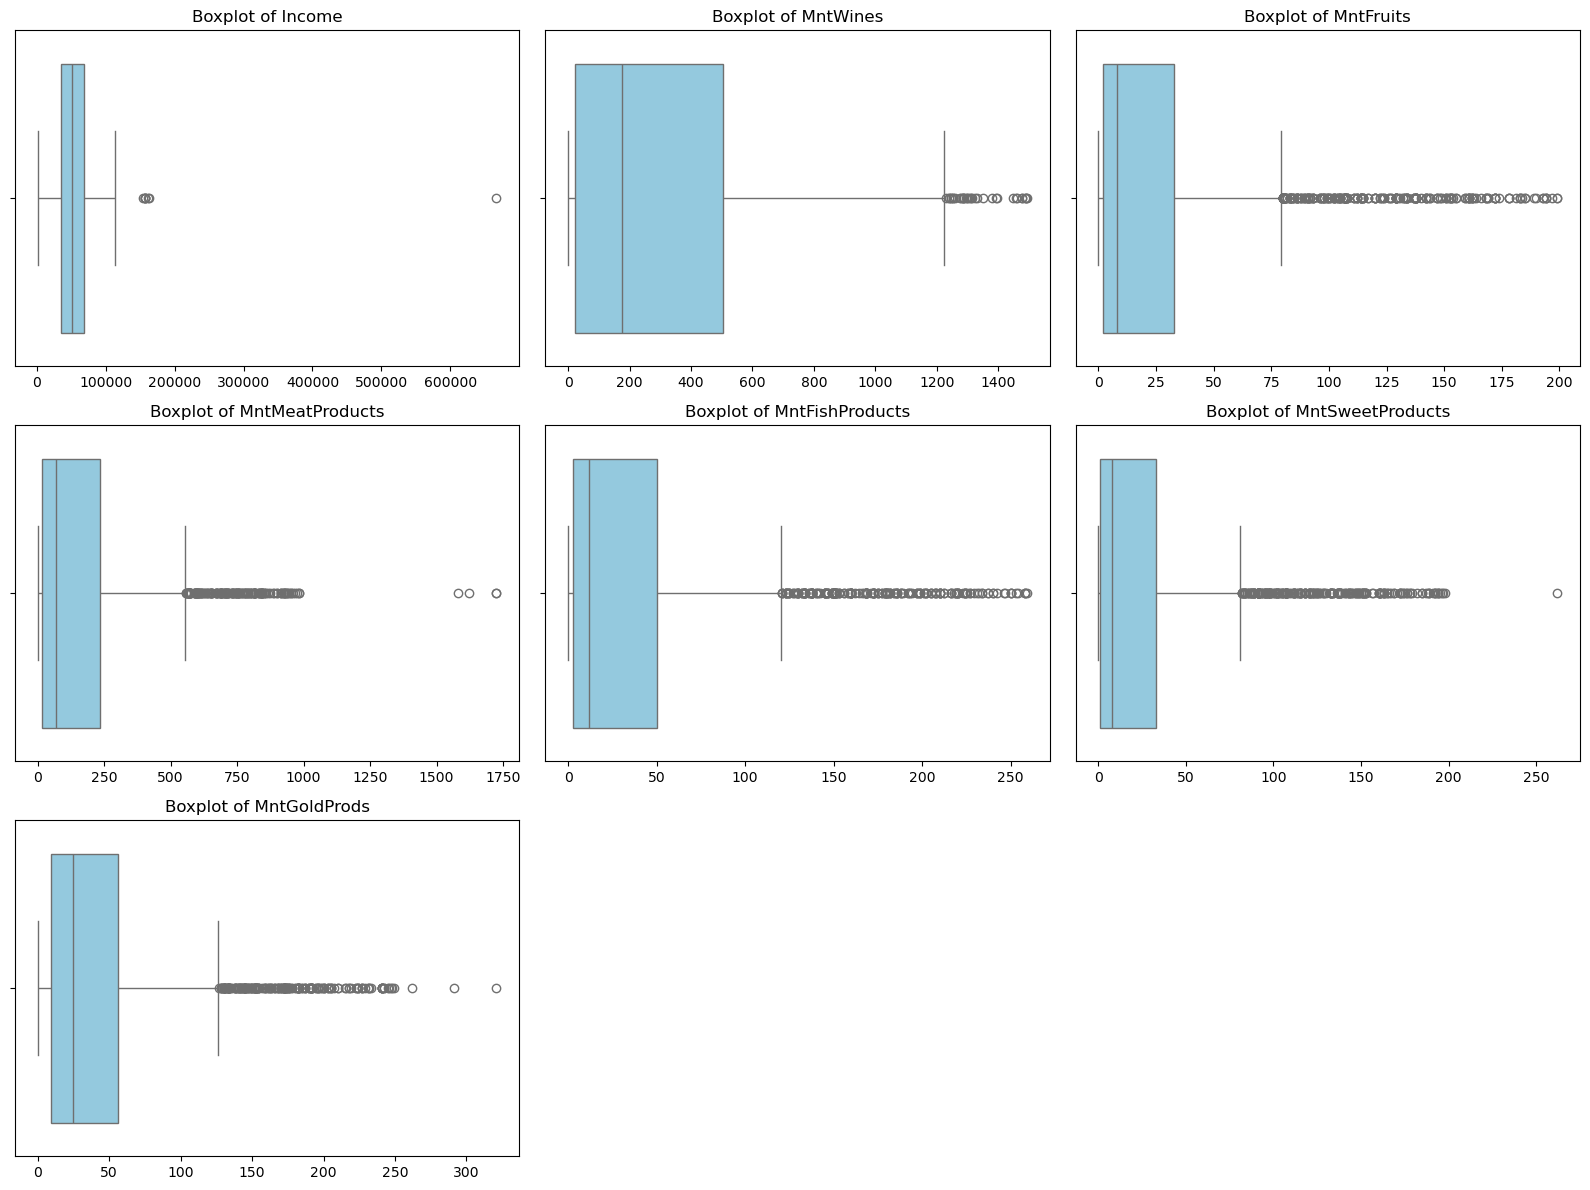

In [67]:
Column_outlier = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(16, 12))

for i, col in enumerate(Column_outlier, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Hasil visualization dengan boxplot diatas menunjukkan bahwa data dari column-column tersebut, sesuai dengan nilai std mereka yaitu sangat besar berbanding nila rata-rata atau *mean*, dan nilai datanya right skewed atau banyak outlier di nilai tertingginya.

In [68]:
for col in Column_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR


    df[col] = df[col].clip(lower, upper)

Disini, metode *Capping* atau menggunakan Interquartil dari data tersebut untuk membatasi outlier atas dan bawah ke nilai quartil 3 dan quartil 1, agar outlier bisa di normalisasikan.

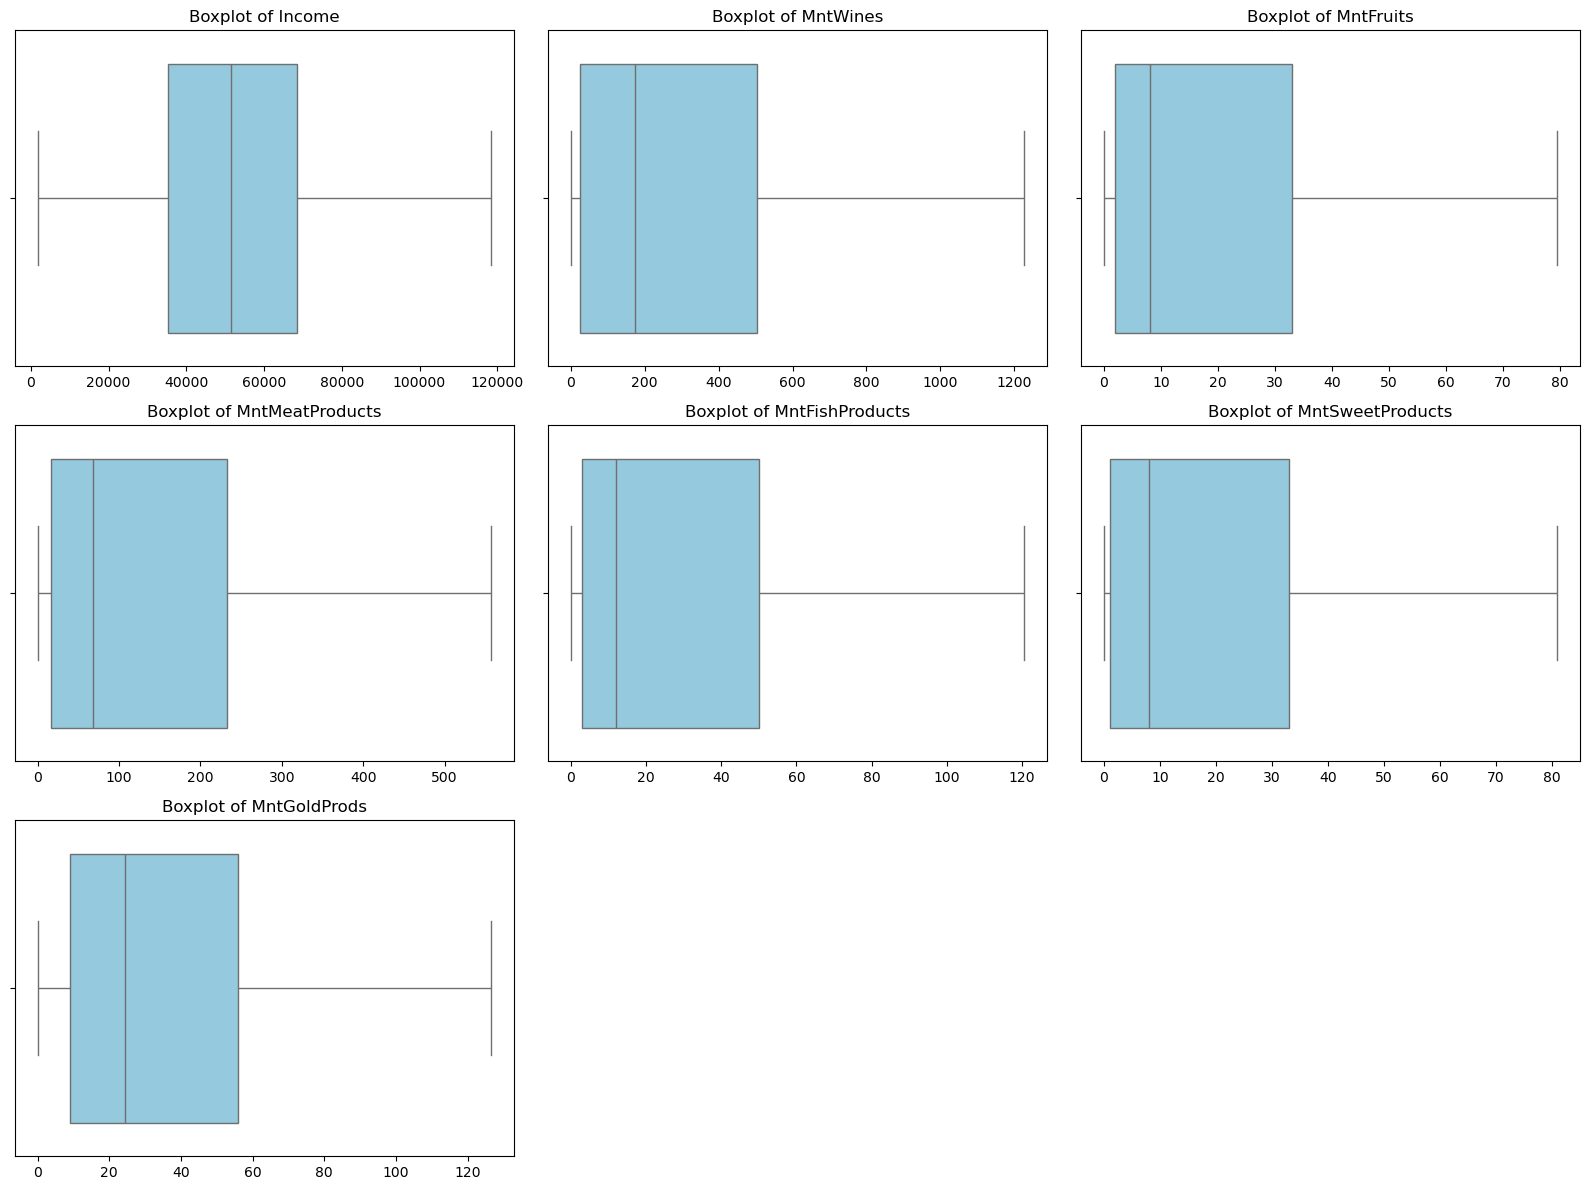

In [69]:
Column_outlier = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(16, 12))

for i, col in enumerate(Column_outlier, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Bisa dilihat, setelah membatasi dengan IQR, boxplot menunjukkan distribusi right skewed tanpa adanya outlier.

# Exploratory Data Analysis

Untuk melakukan EDA, kita akan kembali ke problem statement di awal.

#### 1. Apakah Income atau penghasilan tahunan sebuah rumah tangga atau keluarga berpengaruh terhadap pembelian?

Untuk menjawab pertanyaan ini, kita perlu membuat kolom baru bernama TotalSpent. Kolom ini akan berfungsi menghitung total pengeluaran sebuah rumah tangga atau keluarga dalam dua tahun terakhir. Perhitungan TotalSpent akan dilakukan dengan menggabungkan semua nilai pembelanjaan produk supermarket (seperti MntFruits, MntBeef, dan kolom pengeluaran serupa lainnya).

In [ ]:
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                 df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,79.5,546.0,120.5,81,88.0,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1550.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,1.0,6.0,2.0,1,6.0,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27.0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426.0,49.0,127.0,111.0,21,42.0,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776.0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11.0,4.0,20.0,10.0,3,5.0,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,43.0,118.0,46.0,27,15.0,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422.0


TotalSpent akhirnya berhasil ditambahkan ke dalam dataset,

Selanjutnya, **kita perlu menganalisis distribusi** dari kolom **'Income'** dan **'TotalSpent'**. Untuk melakukan ini, kita akan menggunakan **uji Shapiro-Wilk** untuk menilai normalitas secara statistik, dan juga memvisualisasikannya menggunakan **histogram** yang menyertakan **Kernel Density Estimation (KDE)**. Analisis distribusi ini sangat penting karena hasilnya akan **menentukan pilihan uji hipotesis** yang tepat, yaitu apakah kita harus menggunakan metode **parametrik** atau **non-parametrik**.

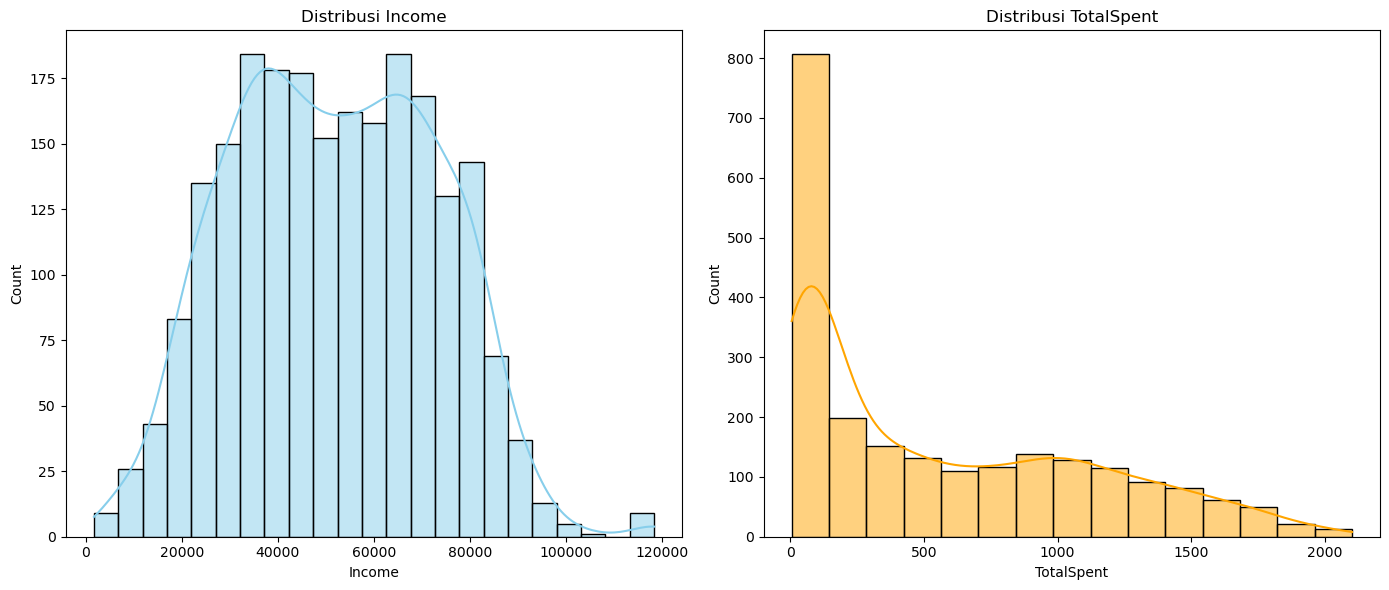

In [71]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df['Income'], kde=True, color='skyblue')
plt.title('Distribusi Income')

plt.subplot(1,2,2)
sns.histplot(df['TotalSpent'], kde=True, color='orange')
plt.title('Distribusi TotalSpent')

plt.tight_layout()
plt.show()


In [72]:
from scipy.stats import shapiro

stat_income, p_income = shapiro(df['Income'])
print(f'Shapiro-Wilk Test untuk Income: Statistik={stat_income}, p-value={p_income}')

stat_spending, p_spending = shapiro(df['TotalSpent'])
print(f'Shapiro-Wilk Test untuk TotalSpent: Statistik={stat_spending}, p-value={p_spending}')


Shapiro-Wilk Test untuk Income: Statistik=0.9864857572070928, p-value=1.2254207527600366e-13
Shapiro-Wilk Test untuk TotalSpent: Statistik=0.8715395445248637, p-value=2.4054065355030448e-39


Analisis visual menunjukkan bahwa **garis $\text{KDE}$** tidak menyerupai kurva lonceng ($\text{bell curve}$), melainkan **miring ke kanan** ($\text{Right Skewed}$), sebuah kecenderungan yang juga teramati melalui *outlier* pada *boxplot* sebelumnya.

Hasil **uji Shapiro-Wilk** secara statistik mengonfirmasi bahwa baik data **'Income'** maupun **'TotalSpent'** **tidak terdistribusi normal**. Meskipun nilai $\text{'Income'}$ hampir mendekati normal dibandingkan $\text{'TotalSpent'}$ yang jauh, kedua variabel menunjukkan **$\text{P value}$ yang jauh di bawah $\text{0.05}$**, sehingga hipotesis nol (data terdistribusi normal) ditolak.

### Hypothesis Problem Statement 1
#### h0 = Tidak ada kaitan antara income rumah tangga dengan jumlah pembelanjaan
#### hA = Ada kaitan antara income rumah tangga dengan jumlah pembelanjaan

Untuk membuktikan hypothesis di atas, kita memerlukan uji korelasi, dan dikarenakan distribusi yang tidak normal, maka kita akan menggunakan Spearman correlation test.

In [73]:
from scipy.stats import spearmanr

corr, p_corr = spearmanr(df['Income'], df['TotalSpent'])
print(f"Spearman correlation: {corr}, p-value: {p_corr}")


Spearman correlation: 0.8480835449759484, p-value: 0.0



Hasil **korelasi Spearman** adalah **$0.805$**, nilai ini menunjukkan adanya **hubungan positif yang sangat erat** antara 'Income' dan 'TotalSpent'. Secara praktis, ini berarti bahwa **peningkatan pendapatan** cenderung diikuti oleh **peningkatan total pengeluaran**.

Selain itu, nilai **$P-value$ yang $0.0$** secara statistik menegaskan bahwa hubungan yang teramati ini **bukanlah hasil kebetulan** (*random*), melainkan signifikan secara statistik.

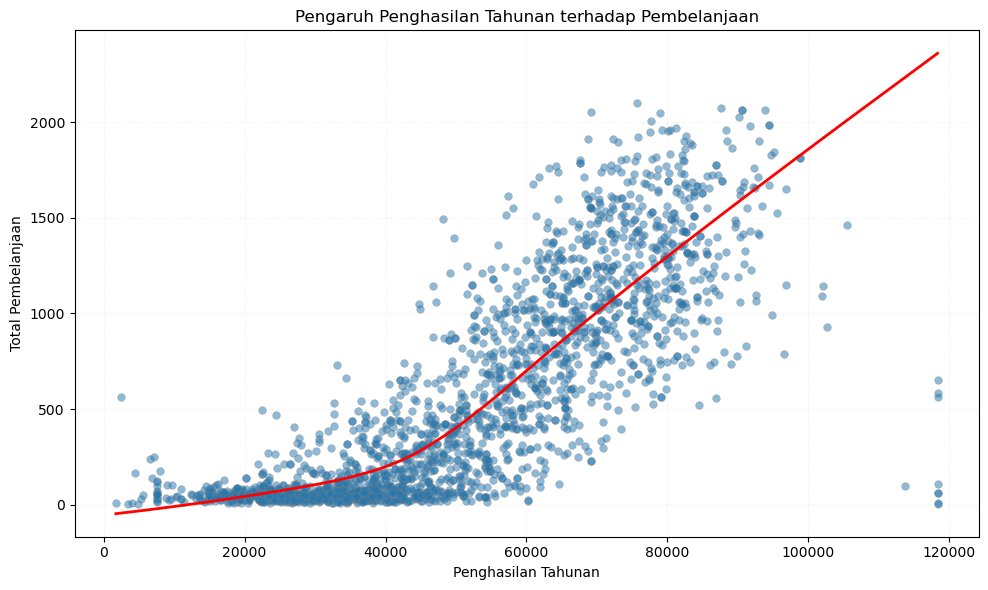

In [74]:
plt.figure(figsize=(10, 6)) 
sns.regplot(
    x='Income',
    y='TotalSpent',
    data=df,
    lowess=True,
    scatter_kws={
        's': 30,               
        'alpha': 0.5,          
        'edgecolor': 'gray',   
        'linewidths': 0.5      
    },
    line_kws={
        'color': 'red',
        'lw': 2
    }
)
plt.title('Pengaruh Penghasilan Tahunan terhadap Pembelanjaan') 
plt.xlabel('Penghasilan Tahunan')
plt.ylabel('Total Pembelanjaan') 
plt.grid(True, linestyle='--', alpha=0.1) 
plt.tight_layout()
plt.show()


Langkah selanjutnya adalah menganalisis **hubungan antara tingkat pendapatan rumah tangga** dengan **pola pembelian** mereka. Untuk tujuan ini, **kita perlu membuat kolom kategori baru** yang membagi pengguna menjadi tiga kelompok: $\text{low}$, $\text{medium}$, dan $\text{high}$ $\text{income}$. Oleh karena itu, langkah krusialnya adalah **menentukan ambang batas** ($\text{cutoff}$) pendapatan yang tepat untuk mendefinisikan masing-masing kategori tersebut.

Berdasarkan **Scatterplot**, dapat **diasumsikan** bahwa pengelompokan tingkat pendapatan adalah sebagai berikut: pengguna **low income** berpenghasilan **di bawah $\text{40.000}$**, pengguna **medium income** memiliki penghasilan **antara $\text{40.000}$ hingga $\text{80.000}$**, dan pengguna **high income** memiliki penghasilan **di atas $\text{80.000}$**.

In [75]:
bins = [df['Income'].min(), 40000, 80000, df['Income'].max()]
labels = ['Low', 'Medium', 'High']
df['Income_Level'] = pd.cut(df['Income'], bins=bins, labels=labels, include_lowest=True)
print(df['Income_Level'].value_counts())


Income_Level
Medium    1267
Low        732
High       217
Name: count, dtype: int64


In [76]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Income_Level
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,79.5,546.0,120.5,81,88.0,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1550.0,Medium
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,1.0,6.0,2.0,1,6.0,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27.0,Medium
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426.0,49.0,127.0,111.0,21,42.0,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776.0,Medium
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11.0,4.0,20.0,10.0,3,5.0,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53.0,Low
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,43.0,118.0,46.0,27,15.0,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422.0,Medium


Dengan menggunakan **titik batas ($\text{cutoff point}$) yang telah ditetapkan**, kami berhasil mengkategorikan pengguna berdasarkan tingkat pendapatan mereka, yang menunjukkan bahwa kolom kategori baru telah berhasil dibuat.

Distribusi pengguna di supermarket adalah: **$\text{730}$ $\text{low income}$**, **$\text{1262}$ $\text{medium income}$**, dan **$\text{217}$ $\text{high income}$** user. Berbekal kategori ini, **analisis selanjutnya akan berfokus** pada pengujian **perbedaan pola pengeluaran ($\text{TotalSpent}$) di antara ketiga kelompok pendapatan** tersebut.

In [77]:
Produk = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']  

for group in ['Low', 'Medium', 'High']:
    group_data = df[df['Income_Level'] == group]
    total_spending = group_data[Produk].sum().sort_values(ascending=False)
    
    print(f"Pengeluaran kategori produk dari tertinggi ke terendah untuk kelompok {group}:")
    print(total_spending)
    print()


Pengeluaran kategori produk dari tertinggi ke terendah untuk kelompok Low:
MntWines            21886.000
MntMeatProducts     17417.625
MntGoldProds        12054.500
MntFishProducts      6403.500
MntSweetProducts     4229.000
MntFruits            4198.000
dtype: float64

Pengeluaran kategori produk dari tertinggi ke terendah untuk kelompok Medium:
MntWines            503244.500
MntMeatProducts     225990.375
MntGoldProds         62392.000
MntFishProducts      48821.000
MntSweetProducts     33004.000
MntFruits            32969.000
dtype: float64

Pengeluaran kategori produk dari tertinggi ke terendah untuk kelompok High:
MntWines            146922.00
MntMeatProducts      91802.75
MntFishProducts      16106.50
MntGoldProds         13080.00
MntSweetProducts     11410.00
MntFruits            10630.00
dtype: float64



Hasilnya menunjukkan pola pengeluaran yang cukup konsisten dan **mengagumkan** di semua kelompok pendapatan ($\text{spending group}$):

1.  **Pengeluaran Terbesar** (Peringkat 1) adalah pada pembelian **anggur ($\text{wines}$)**.
2.  **Peringkat Kedua** diduduki oleh produk **daging-dagingan ($\text{meat}$)**.
3.  **Peringkat Ketiga** menunjukkan sedikit perbedaan:
    * Pengguna **low** dan **medium income** memprioritaskan pembelian **emas** ($\text{gold}$).
    * Pengguna **high income** memprioritaskan pembelian **ikan** ($\text{fish}$).

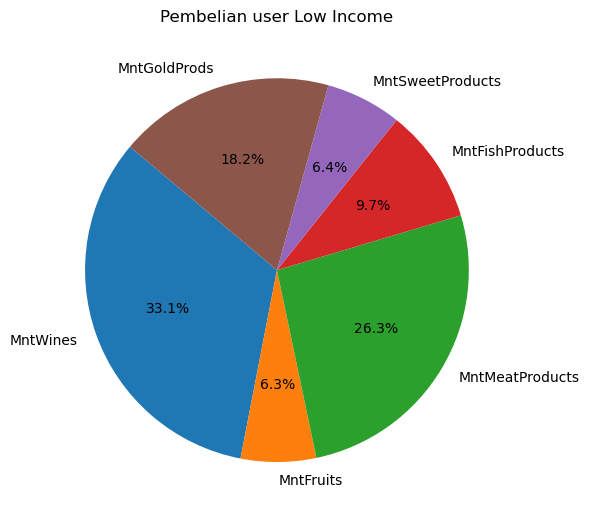

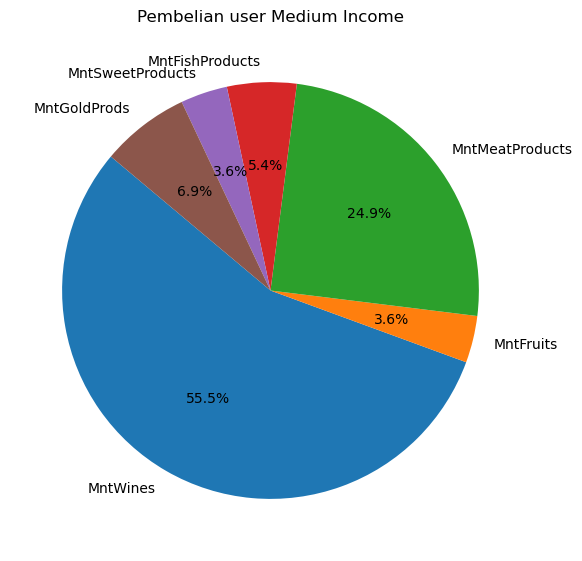

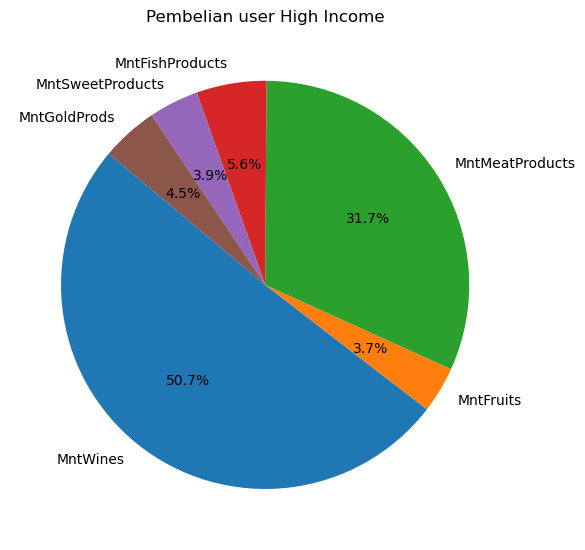

In [78]:

low_income = df[df['Income_Level'] == 'Low'][['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(6, 6))
plt.pie(low_income, labels=low_income.index, autopct='%1.1f%%', startangle=140)
plt.title('Pembelian user Low Income')
plt.tight_layout()
plt.show()

medium_income = df[df['Income_Level'] == 'Medium'][['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()    
plt.figure(figsize=(6, 6))
plt.pie(medium_income, labels=medium_income.index, autopct='%1.1f%%', startangle=140)                   
plt.title('Pembelian user Medium Income')
plt.tight_layout()
plt.show()

high_income = df[df['Income_Level'] == 'High'][['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
plt.figure(figsize=(6, 6))  
plt.pie(high_income, labels=high_income.index, autopct='%1.1f%%', startangle=140)
plt.title('Pembelian user High Income')
plt.tight_layout()
plt.show()  





Visualisasi **Pie Chart** dengan jelas menunjukkan bahwa produk **anggur ($\text{wines}$)** mendominasi total pengeluaran di **setiap level pendapatan**. Secara spesifik, kelompok **medium income** memiliki persentase pembelian anggur tertinggi. Berdasarkan temuan ini, selanjutnya kita akan menganalisis lebih detail untuk mengidentifikasi **siapa pembeli terbesar** untuk **setiap kategori produk** yang ada.

#### 2. Apakah campaign atau acara promosi yang diberikan Supermarket berhasil untuk mendorong pembelian? jika iya, promosi yang mana yang efektif?

Untuk menjawab pertanyaan ini, **kita perlu membuat kolom data gabungan baru** yang menyatukan semua kolom kampanye promosi. Tujuan dari kolom baru ini adalah untuk mengetahui **rata-rata jumlah kampanye promosi yang diterima** oleh setiap pelanggan/rumah tangga di supermarket. Secara teknis, ini dilakukan dengan **menghitung nilai rata-rata** dari semua kolom kampanye promosi (yang nilainya berupa $\text{0}$ atau $\text{1}$) untuk setiap pelanggan.

### Hypothesis Problem Statement 2
#### h0 = Tidak ada perbedaan antara kesuksesan setiap campaign promosi
#### hA = Ada perbedaan antara kesuksesan setiap campaign promosi

Di karenakan setiap campaign memiliki data 0 atau 1, maka tidak diperlukan test distribusi, karena dipastikan tidak akan mengikuti bell curve, sehingga diperlukan non parametric test.

In [79]:
from statsmodels.stats.contingency_tables import cochrans_q

Campaign_Promo = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

result = cochrans_q(df[Campaign_Promo])

print(f"Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")


Statistic: 375.51411827384123
P-value: 5.602326881381158e-79


Karena kolom-kolom promosi kita memiliki nilai **boolean** ($\text{0}$ atau $\text{1}$), yang merupakan data non-parametrik, **Cochran's Q Test** digunakan. Uji ini berfungsi untuk **membandingkan tingkat penerimaan ($\text{acceptance}$)** pelanggan ($\text{TRUE}$ atau $\text{FALSE}$) di antara setiap kampanye promosi.

Hasil dari uji ini menunjukkan **$P-value$ yang sangat mendekati $0$**. Kesimpulan dari ini adalah bahwa **sangat tidak mungkin** ($\text{hampir mustahil}$) untuk menyatakan bahwa **tidak ada perbedaan** tingkat keberhasilan di antara setiap kampanye. Selain itu, nilai **Statistics** memberikan indikasi mengenai **besarnya perbedaan sukses** antar kampanye. Temuan ini dapat kita konfirmasi lebih lanjut melalui **perhitungan rata-rata sukses** dan **visualisasi**.

In [80]:
Campaign_List = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']


Campaign_Success = df[Campaign_List].mean() * 100
print("Persentase Kesuksesan Promo:\n", Campaign_Success)


Persentase Kesuksesan Promo:
 AcceptedCmp1     6.407942
AcceptedCmp2     1.353791
AcceptedCmp3     7.355596
AcceptedCmp4     7.400722
AcceptedCmp5     7.310469
Response        15.027076
dtype: float64


Secara umum, hasil perhitungan **rata-rata keberhasilan** keenam kampanye promosi (Promosi 1 hingga $\text{Response}$) tergolong **rendah**, dengan tingkat sukses rata-rata hanya mencapai **$7.2\%$**.

Meskipun demikian, **Campaign ke-6 ('Response')** menjadi yang **paling sukses** dengan tingkat penerimaan **$15\%$**. Sebaliknya, **Campaign ke-2** dianggap **gagal** karena tingkat kesuksesannya yang **$1\%$**, jauh di bawah rata-rata keseluruhan.

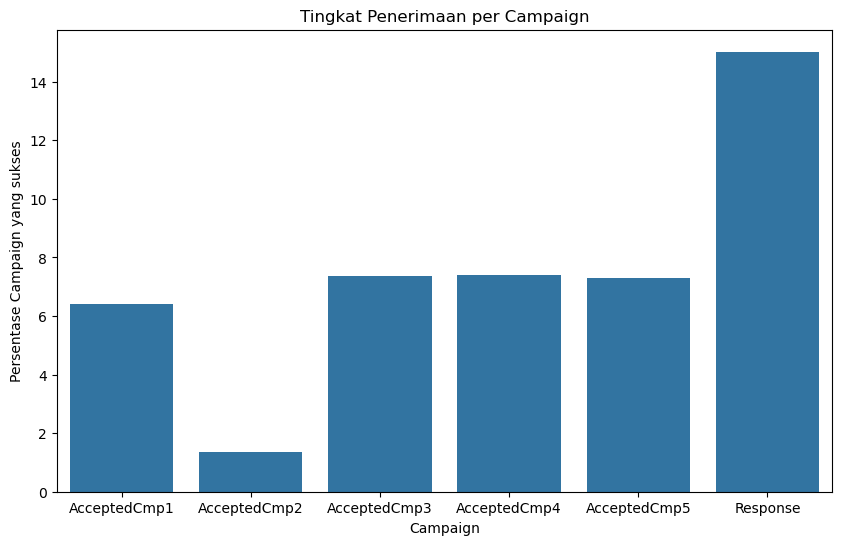

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Campaign_Success.index, y=Campaign_Success.values)
plt.title('Tingkat Penerimaan per Campaign')
plt.xlabel('Campaign')
plt.ylabel('Persentase Campaign yang sukses')
plt.show()

Visualisasi *bar chart* memperjelas bahwa **'Response' (Campaign ke-6)** adalah **kampanye yang paling sukses**, sedangkan **Campaign ke-2** adalah yang memiliki kinerja **paling buruk**.

Secara keseluruhan, terlihat bahwa **kualitas kampanye rata-rata perlu ditingkatkan** untuk mencapai keberhasilan yang signifikan. Hal ini dapat dicapai dengan **mencontoh dan mengadopsi strategi dari Campaign 'Response'**, yang berhasil meraih tingkat pembelian dengan promosi sebesar **$15\%$**, menjadikannya **lebih dari dua kali lipat** tingkat kesuksesan rata-rata.

#### 3. Bagaimanakah cara customer berbelanja? Apakah dengan adanya website atau laman supermarket, pembelian bisa di-insentifkan?

Untuk menjawab pertanyaan ini, kita harus menghitung jumlah total pembelian dari setiap cara pembelian, yaitu dengan membeli langsung di toko (NumStorePurchases), Membeli melalui katalog toko (NumCatalogPurchases) dan Membeli melalui website atau laman web toko (NumWebPurchases)

In [82]:
Purchase_Per_Channel = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

print("Jumlah Pembelian menggunakan methode:\n", Purchase_Per_Channel.sort_values(ascending=False))

Jumlah Pembelian menggunakan methode:
 NumStorePurchases      12855
NumWebPurchases         9053
NumCatalogPurchases     5919
dtype: int64


Setelah menghitung menggunakan .sum(), bisa dilihat bahwa membeli langsung di toko adalah cara pembelian terlaris, dengan 12818 pembelian, dan membeli melalui katalog adalah yang terbawah dengan 5900 pembelian, kurang dari setengah pembelian langsung di toko.

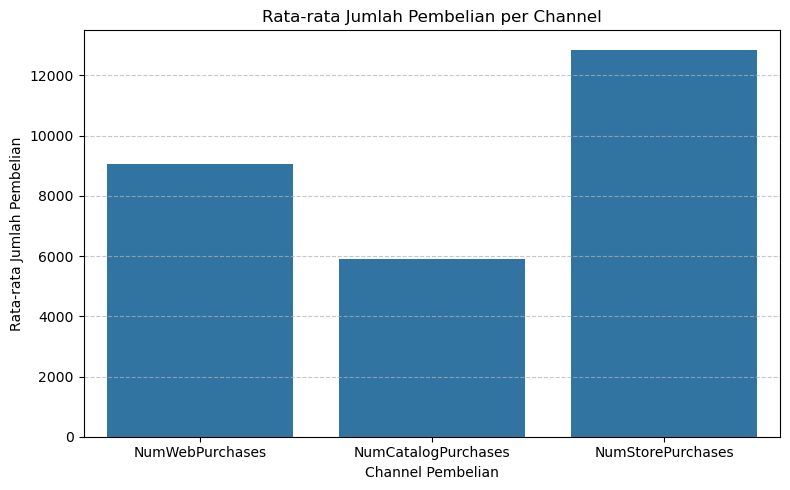

In [83]:
plt.figure(figsize=(8, 5))
sns.barplot(x=Purchase_Per_Channel.index, y=Purchase_Per_Channel.values)
plt.title('Rata-rata Jumlah Pembelian per Channel')
plt.xlabel('Channel Pembelian')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*Bar plot* tersebut dengan jelas mengindikasikan bahwa **pembelian langsung di toko fisik** adalah metode yang paling disukai pengguna, sementara pembelian melalui **katalog** menempati posisi terendah.

Selanjutnya, kita akan menganalisis **keberhasilan *website* supermarket** sebagai saluran pembelian. Untuk memulainya, kita perlu **memeriksa distribusi** dari variabel **$\text{NumWebPurchases}$** (jumlah pembelian via web) dan **$\text{NumWebVisitsMonth}$** (jumlah kunjungan web per bulan).

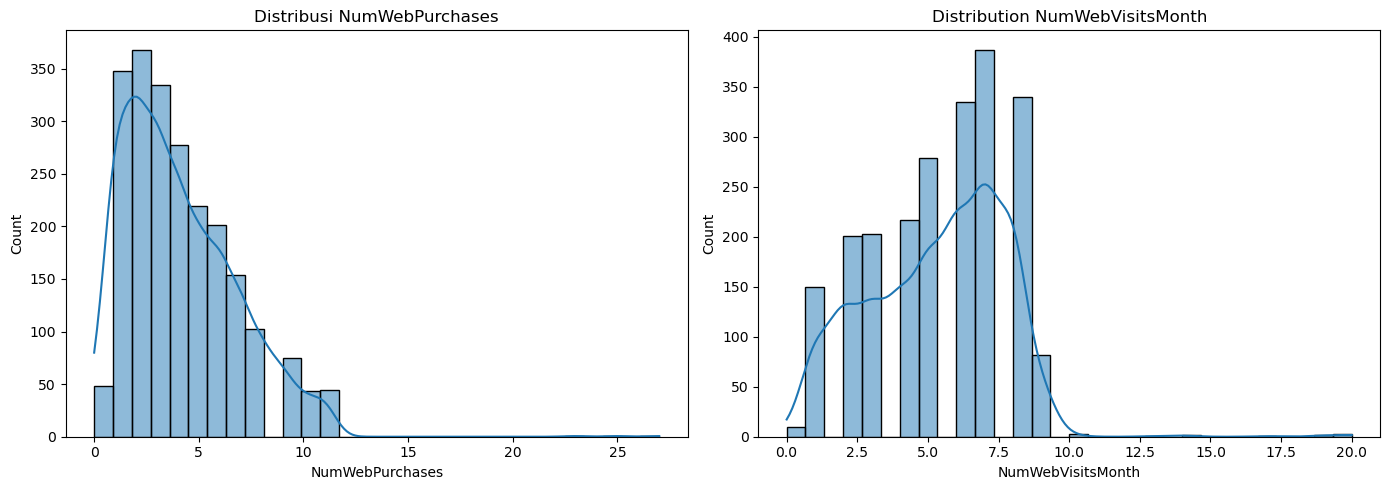

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(df['NumWebPurchases'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribusi NumWebPurchases')

sns.histplot(df['NumWebVisitsMonth'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution NumWebVisitsMonth')

plt.tight_layout()
plt.show()


Bisa dilihat bahwa distribusinya tidak mengikuti bell curve, sehingga kita bisa menggunakan korelasi non parametric spearman.

### Hypothesis Problem Statement 3
#### h0 = Tidak ada kaitan antara jumlah kunjungan web dan pembelian lewat web
#### hA = Ada kaitan antara jumlah kunjungan web dan pembelian lewat web

In [85]:
corr_spear, p_val = spearmanr(df['NumWebVisitsMonth'], df['NumWebPurchases'])
print(f"Spearman correlation: {corr_spear:.4f}, p-value: {p_val:.4g}")


Spearman correlation: -0.0969, p-value: 4.845e-06


Hasil analisis menunjukkan adanya **korelasi negatif yang lemah** ($-\text{0.1}$) antara jumlah kunjungan *website* dan jumlah pembelian melalui *web*. Ini mengindikasikan bahwa **peningkatan kunjungan *website* justru sedikit menurunkan volume pembelian**.

Meskipun korelasinya lemah, **nilai $P-value$ yang mendekati $0$** menegaskan bahwa hubungan ini **signifikan secara statistik** (bukan hasil acak). Artinya, ada kaitan yang **signifikan** namun **lemah** antara frekuensi kunjungan *web* dan pembelian yang terjadi di *platform* tersebut.

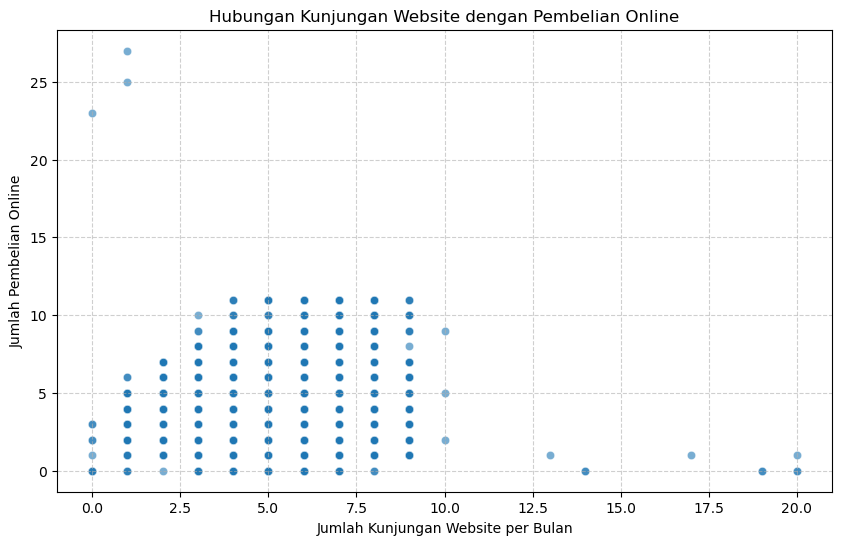

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, alpha=0.6)
plt.title('Hubungan Kunjungan Website dengan Pembelian Online')
plt.xlabel('Jumlah Kunjungan Website per Bulan')
plt.ylabel('Jumlah Pembelian Online')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Hasil visualisasi **scatterplot** mengungkapkan **pola yang tidak linear atau tidak wajar** antara frekuensi kunjungan *website* dan jumlah pembelian yang dilakukan pengguna.

Secara spesifik:

1.  Pada rentang **1 hingga $\text{3.5}$ kunjungan per bulan**, terlihat **tren positif**—semakin sering pengguna mengunjungi *website*, semakin sering mereka melakukan pembelian.
2.  Namun, setelah melampaui $\text{3.5}$ kunjungan, pola tersebut **terhenti**: pengguna tidak menunjukkan peningkatan frekuensi pembelian, bahkan hingga **$\text{9}$ kunjungan** per bulan.
3.  Lebih lanjut, bagi pengguna yang mengunjungi *website* **lebih dari $\text{9}$ kali** setiap bulan, terlihat **tren negatif** yang signifikan, di mana frekuensi pembelian justru semakin jarang.

In [87]:
total_web_purchases = df['NumWebPurchases'].sum()
total_web_visits = df['NumWebVisitsMonth'].sum()

print(f"Total Pembelian melalui Website: {total_web_purchases}")
print(f"Total Kunjungan Website: {total_web_visits}")

Total Pembelian melalui Website: 9053
Total Kunjungan Website: 11787


Setelah membandingkan total pengunjung dengan total pembeli, ditemukan bahwa dari keseluruhan **$\text{11.749}$ kunjungan**, hanya **$\text{9.017}$ kunjungan** yang berujung pada pembelian. Dengan demikian, **rasio konversi** (rasio kunjungan yang menghasilkan pembelian terhadap total kunjungan) adalah sekitar **$\text{77\%}$**.

## 🎯 Kesimpulan


Kesimpulan utama mengenai saluran pembelian adalah: **pelanggan paling sering berbelanja melalui pembelian langsung di toko fisik**, dan **paling jarang menggunakan katalog**.

Selain itu, indikasi bahwa peningkatan kunjungan *website* akan meningkatkan pembelian secara *online* adalah **negatif** ($\text{-0.1}$). Hal ini diperkuat oleh *scatterplot* yang menunjukkan bahwa pelanggan **berhenti meningkatkan frekuensi pembelian per kunjungan** setelah mereka mengunjungi *website* **hanya $\text{3.5}$ kali** dalam sebulan.

Untuk detailnya sebagai berikut: 

- Customer cenderung berbelanja sesuai dengan kelompok penghasilan tahunan rumah tangga mereka.
- Di semua kelompok income, produk yang paling banyak dibeli adalah wines, diikuti oleh daging dan emas untuk kelompok low dan medium income, serta ikan untuk kelompok high income.
- Secara rata-rata, kesuksesan campaign promosi supermarket masih rendah.
- Promosi paling bagus adalah promosi terakhir atau 'Response' dengan 15% pembeli yang tertarik, sedangkan yang terburuk adalah promosi 2 dengan hanya 1% pembelian.
- Metode berbelanja pilihan kebanyakan customer adalah dengan membeli langsung di toko (12818), mengalahkan website atau laman (9017) dan Katalog (5900).
- Meskipun rasio pembelian per kunjungan di website cukup tinggi (77%), tidak terlihat peningkatan pembelian setelah user melakukan kunjungan melewati 3.5 kali per bulan.

### Rekomendasi Actionable



**1. Penargetan Pelanggan (Segmentasi Income)**

* **Segmentasi pengguna** berdasarkan tingkat pendapatan ($\text{Income}$) menjadi tiga kategori: **Low** ($\leq \text{40.000}$), **Medium** ($\text{40.000}$ hingga $\text{80.000}$), dan **High** ($\geq \text{80.000}$).

**2. Strategi Peningkatan Penjualan (Sales & Produk)**

* **Fokuskan peningkatan penjualan dan promosi** pada kategori produk terpopuler, yaitu **Anggur ($\text{Wines}$)** dan **Daging-dagingan ($\text{Meat}$)**.
    * Tawarkan **program *loyalty card*** untuk memberikan insentif tambahan agar pelanggan terus berbelanja.
    * Luncurkan **kampanye dan program promosi baru** yang secara khusus menargetkan kategori produk yang **kurang populer** untuk meningkatkan persentase pembeliannya.

**3. Peningkatan Kualitas Kampanye Promosi**

* **Jadikan Campaign 'Response' sebagai *benchmark*** untuk meningkatkan kualitas kampanye lainnya, mengingat tingkat kesuksesannya yang mencapai **$15\%$**—lebih dari dua kali lipat rata-rata sukses kampanye ($\approx 7\%$).

**4. Optimasi Saluran *Online* (Website)**

* **Tingkatkan kualitas *website* dan promosi *online*** untuk menargetkan **$23\%$** dari total pengunjung yang meninggalkan *website* tanpa melakukan pembelian.
    * Terapkan **promosi atau kampanye eksklusif *website-only*** yang hanya dapat diklaim melalui pembelian *online*.
    * Perkenalkan **promosi yang bersifat terbatas waktu (*time-based*)** untuk menciptakan kesan urgensi dan eksklusivitas.

### Verified Data Cleaning

In [89]:
print(df.shape)  # Jumlah baris & kolom


(2216, 31)


In [90]:
print(df.info())  # Tipe data & non-null


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   float64       
 10  MntFruits            2216 non-null   float64       
 11  MntMeatProducts      2216 non-null   float64       
 12  MntFishProducts      2216 non-null   float64       
 13  MntSweetProducts     2216 non-null   i

In [91]:
print(df.isna().sum())  # Jumlah nilai hilang per kolom


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
TotalSpent             0
Income_Level           0
dtype: int64


In [92]:
print(df.duplicated().sum())  # Jumlah duplikat


0
